In [67]:
#!pip install opencv-contrib-python
#!pip install moviepy

In [68]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
from moviepy.editor import VideoFileClip, AudioFileClip,concatenate_videoclips
#import tqdm
#import time

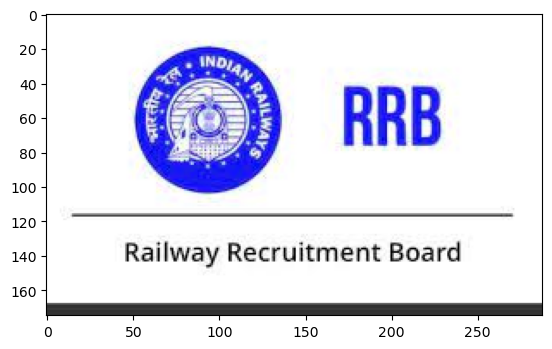

In [69]:
img=str(1)+'.jpg'
img=cv.imread(img)
plt.imshow(img)

In [70]:
audio=AudioFileClip('audio.mp3')
print(audio.duration)
video_duration=audio.duration
audio

34.56


In [71]:
imgs=[]
a=1
b=5+1 #number of images + 1
#txt1="Samachar "
txt2="Samachar Hut"
video_width=900
video_height=1600
for i in range(a,b):
    if i>1:
        img2=img1
    else:
        img2=str(1+(i)%(b-1))+'.jpg'
        #print(img2)
        img2=cv.imread(img2)
        img2=cv.resize(img2,(video_width,video_height))
    img1=str(i)+'.jpg'
    #print(img)
    img1=cv.imread(img1)
    img1=cv.resize(img1,(video_width,video_height))
    
    
    #print(img1.shape)
    #imgs.append(img1)
    for k in range(1,40):
        if i%2==0:
            img=cv.addWeighted(img1,0.025*k,img2,1-0.025*k,0)
        else:
            img=cv.addWeighted(img1,1-0.025*k,img2,0.025*k,0)
        #adding text
        r=int((img1[350][350]+250)[0])
        g=int((img1[350][350]+250)[1])
        b=int((img1[350][350]+250)[2])
        #cv.putText(img,txt1,(10*k,k*10),cv.FONT_HERSHEY_COMPLEX,1,
                   #(r,g,b),1)
        cv.putText(img,txt2,(10*(40-k),(40-k)*10),cv.FONT_HERSHEY_COMPLEX,1,
                   (r,g,b),1)
        imgs.append(img)
    #plt.imshow(img)
    

In [72]:
len(imgs)

195

In [73]:
if len(imgs)<int(video_duration):
    imgs1=imgs
    imgs=imgs + imgs1

In [74]:
imgs=imgs[:int(video_duration)]

In [75]:
fps=int(len(imgs)/int(video_duration))
fps

1

In [76]:
min=1
sec=15
#fps=10
#width=imgs[0].shape[1]
#height=imgs[0].shape[0]
video=cv.VideoWriter('video.mp4',
                    cv.VideoWriter_fourcc(*'mp4v'),fps,(video_width,video_height))
#num_frames=(int(video_duration))*fps
#repeated_images = np.tile(imgs, (num_frames // len(imgs), 1, 1,1 ))
#for img in repeated_images: 
for img in imgs:
    video.write(img)
    #print(i)
    #print(img)
    #time.sleep(0.5)
cv.destroyAllWindows()
video.release()

In [77]:
video=VideoFileClip('video.mp4')
print(video.duration)
video

34.0
